In [1]:
# Librería para manejo de datos
import pandas as pd
import numpy as np
# Librerías para graficar
import plotly.express as px
# Gráficas estáticas
import matplotlib.pyplot as plt

In [41]:
# Leer archivos csv y almacenarlos en Dataframes
taxis_201712 = pd.read_csv(r"yellow_tripdata_2017-12.csv", sep=',')
taxis_201812 = pd.read_csv(r"yellow_tripdata_2018-12.csv", sep=',')
taxis_201912 = pd.read_csv(r"yellow_tripdata_2019-12.csv", sep=',')
taxis_202012 = pd.read_csv(r"yellow_tripdata_2020-12.csv", sep=',')
zonas = pd.read_csv(r"zone_lookup.csv", sep=',')

C:\Users\Nirobe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.



In [42]:
#visualizar los primeros registros
taxis_201712.head(20)
taxis_201812.head(20)
taxis_201912.head(20)
taxis_202012.head(20)
zonas.head(20)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [ ]:
#Sort de los datos
taxis_201712 = taxis_201712.sort_values(by=['tpep_pickup_datetime'])
taxis_201812 = taxis_201812.sort_values(by=['tpep_pickup_datetime'])
taxis_201912 = taxis_201912.sort_values(by=['tpep_pickup_datetime'])
taxis_202012 = taxis_202012.sort_values(by=['tpep_pickup_datetime'])

In [50]:
#Muestra de datos
#visualizar los primeros registros
taxis_201712 = taxis_201712.head(100000)
taxis_201812 = taxis_201812.head(100000)
taxis_201912 = taxis_201912.head(100000)
taxis_202012 = taxis_202012.head(100000)


In [52]:
# Revisar los tipos de data en el archivo
taxis_201712.dtypes
taxis_201812.dtypes
taxis_201912.dtypes
taxis_202012.dtypes


VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [53]:
zonas.dtypes

LocationID       int64
Borough         object
Zone            object
service_zone    object
dtype: object

In [54]:
#Se crea columna de años a partir de la fecha
taxis_201712['year'] = taxis_201712['tpep_pickup_datetime'].str.slice(0, 4)
taxis_201812['year'] = taxis_201812['tpep_pickup_datetime'].str.slice(0, 4)
taxis_201912['year'] = taxis_201912['tpep_pickup_datetime'].str.slice(0, 4)
taxis_202012['year'] = taxis_202012['tpep_pickup_datetime'].str.slice(0, 4)

In [55]:
#Se filtra registros que no esten en el año indicado
taxis_201712=taxis_201712.loc[taxis_201712['year'] == '2017']
taxis_201812=taxis_201812.loc[taxis_201812['year'] == '2018']
taxis_201912=taxis_201912.loc[taxis_201912['year'] == '2019']
taxis_202012=taxis_202012.loc[taxis_202012['year'] == '2020']

In [56]:
#Unimos los dataframes en uno solo
years2017_2018=pd.concat([taxis_201712, taxis_201812], ignore_index=True)

In [57]:
#Unimos los dataframes en uno solo
years2019_2020=pd.concat([taxis_201912, taxis_202012], ignore_index=True)

In [58]:
#Unimos los dataframes en uno solo
allyears=pd.concat([years2017_2018, years2019_2020], ignore_index=True)

In [12]:
#Para eliminar memoria de la RAM
del taxis_201712
del taxis_201812
del taxis_201912
del taxis_202012
del years2017_2018
del years2019_2020

In [59]:
#Visualizar columnas DF
allyears.columns
#allyears


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'year', 'congestion_surcharge'],
      dtype='object')

In [60]:
allyears.max()

VendorID                                 4.0
tpep_pickup_datetime     2020-12-07 17:42:07
tpep_dropoff_datetime    2020-12-07 18:08:12
passenger_count                          7.0
trip_distance                          94.81
RatecodeID                               5.0
store_and_fwd_flag                         Y
PULocationID                             265
DOLocationID                             265
payment_type                             4.0
fare_amount                            535.0
extra                                    3.5
mta_tax                                  0.5
tip_amount                             222.4
tolls_amount                           888.0
improvement_surcharge                    0.3
total_amount                           892.8
year                                    2020
congestion_surcharge                     2.5
dtype: object

In [61]:
allyears_Analisis=allyears[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance','PULocationID', 'DOLocationID','tip_amount', 'tolls_amount','total_amount', 'year']]

In [62]:
del allyears

In [63]:
allyears_Analisis.dtypes

tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
PULocationID               int64
DOLocationID               int64
tip_amount               float64
tolls_amount             float64
total_amount             float64
year                      object
dtype: object

In [64]:
allyears_Analisis

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017
2,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017
3,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017
4,2017-11-30 15:42:10,2017-11-30 15:49:08,1.0,1.54,79,90,1.00,0.00,9.30,2017
...,...,...,...,...,...,...,...,...,...,...
79994,2020-12-07 15:23:31,2020-12-07 15:47:03,1.0,3.20,186,79,3.96,0.00,23.76,2020
79995,2020-12-07 15:57:46,2020-12-07 16:03:52,1.0,0.90,107,137,1.96,0.00,11.76,2020
79996,2020-12-07 16:16:44,2020-12-07 16:22:04,1.0,0.90,237,237,0.93,0.00,10.23,2020
79997,2020-12-07 16:52:02,2020-12-07 17:06:58,1.0,1.80,162,246,2.86,0.00,17.16,2020


In [65]:
#El porcentaje de NaN en passenger_count es muy pequeño, asi que obviamos la omision.
allyears_Analisis.isna().sum()/len(allyears_Analisis)

tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
PULocationID             0.0
DOLocationID             0.0
tip_amount               0.0
tolls_amount             0.0
total_amount             0.0
year                     0.0
dtype: float64

In [66]:
#Se realiza join para encontrar Zona salida
allyears_Analisis_join_Salida=pd.merge(allyears_Analisis, zonas, how='left', left_on='PULocationID', right_on='LocationID')

In [67]:
del allyears_Analisis

In [68]:
allyears_Analisis_join_Salida

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,LocationID,Borough,Zone,service_zone
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone
2,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone
3,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone
4,2017-11-30 15:42:10,2017-11-30 15:49:08,1.0,1.54,79,90,1.00,0.00,9.30,2017,79,Manhattan,East Village,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,2020-12-07 15:23:31,2020-12-07 15:47:03,1.0,3.20,186,79,3.96,0.00,23.76,2020,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
79995,2020-12-07 15:57:46,2020-12-07 16:03:52,1.0,0.90,107,137,1.96,0.00,11.76,2020,107,Manhattan,Gramercy,Yellow Zone
79996,2020-12-07 16:16:44,2020-12-07 16:22:04,1.0,0.90,237,237,0.93,0.00,10.23,2020,237,Manhattan,Upper East Side South,Yellow Zone
79997,2020-12-07 16:52:02,2020-12-07 17:06:58,1.0,1.80,162,246,2.86,0.00,17.16,2020,162,Manhattan,Midtown East,Yellow Zone


In [69]:
allyears_Analisis_join_Salida.isna().sum()/len(allyears_Analisis_join_Salida)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
year                     0.000000
LocationID               0.000000
Borough                  0.000000
Zone                     0.000938
service_zone             0.012413
dtype: float64

In [70]:
#Renombramos columnas para quitarlas a futuro, ya que las obtenemos del segundo join
allyears_Analisis_join_Salida=allyears_Analisis_join_Salida.rename(columns={"LocationID": "quitar", "Borough": "Borough_Salida", "Zone": "Zona_Salida", "service_zone": "service_zone_salida"})

In [71]:
allyears_Analisis_join_Salida

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,quitar,Borough_Salida,Zona_Salida,service_zone_salida
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone
2,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone
3,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone
4,2017-11-30 15:42:10,2017-11-30 15:49:08,1.0,1.54,79,90,1.00,0.00,9.30,2017,79,Manhattan,East Village,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,2020-12-07 15:23:31,2020-12-07 15:47:03,1.0,3.20,186,79,3.96,0.00,23.76,2020,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone
79995,2020-12-07 15:57:46,2020-12-07 16:03:52,1.0,0.90,107,137,1.96,0.00,11.76,2020,107,Manhattan,Gramercy,Yellow Zone
79996,2020-12-07 16:16:44,2020-12-07 16:22:04,1.0,0.90,237,237,0.93,0.00,10.23,2020,237,Manhattan,Upper East Side South,Yellow Zone
79997,2020-12-07 16:52:02,2020-12-07 17:06:58,1.0,1.80,162,246,2.86,0.00,17.16,2020,162,Manhattan,Midtown East,Yellow Zone


In [72]:
#Se realiza join para encontrar Zona llegada
allyears_Analisis_join=pd.merge(allyears_Analisis_join_Salida, zonas, how='left', left_on='DOLocationID', right_on='LocationID')

In [73]:
# Podemos comprobar las ausencias con esta línea de código. 
allyears_Analisis_join.isna().sum()/len(allyears_Analisis_join)

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
year                     0.000000
quitar                   0.000000
Borough_Salida           0.000000
Zona_Salida              0.000938
service_zone_salida      0.012413
LocationID               0.000000
Borough                  0.000000
Zone                     0.003750
service_zone             0.014125
dtype: float64

In [74]:
allyears_Analisis_join

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,year,quitar,Borough_Salida,Zona_Salida,service_zone_salida,LocationID,Borough,Zone,service_zone
0,2017-11-30 05:44:12,2017-11-30 06:10:40,1.0,12.50,7,188,7.46,0.00,44.76,2017,7,Queens,Astoria,Boro Zone,188,Brooklyn,Prospect-Lefferts Gardens,Boro Zone
1,2017-11-30 05:46:42,2017-11-30 06:11:24,1.0,6.87,234,82,2.08,0.00,26.38,2017,234,Manhattan,Union Sq,Yellow Zone,82,Queens,Elmhurst,Boro Zone
2,2017-11-30 06:04:38,2017-12-01 05:35:51,1.0,5.22,230,7,4.86,0.00,29.16,2017,230,Manhattan,Times Sq/Theatre District,Yellow Zone,7,Queens,Astoria,Boro Zone
3,2017-11-30 08:12:51,2017-12-01 07:39:57,2.0,9.99,161,181,6.00,5.76,42.56,2017,161,Manhattan,Midtown Center,Yellow Zone,181,Brooklyn,Park Slope,Boro Zone
4,2017-11-30 15:42:10,2017-11-30 15:49:08,1.0,1.54,79,90,1.00,0.00,9.30,2017,79,Manhattan,East Village,Yellow Zone,90,Manhattan,Flatiron,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,2020-12-07 15:23:31,2020-12-07 15:47:03,1.0,3.20,186,79,3.96,0.00,23.76,2020,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,79,Manhattan,East Village,Yellow Zone
79995,2020-12-07 15:57:46,2020-12-07 16:03:52,1.0,0.90,107,137,1.96,0.00,11.76,2020,107,Manhattan,Gramercy,Yellow Zone,137,Manhattan,Kips Bay,Yellow Zone
79996,2020-12-07 16:16:44,2020-12-07 16:22:04,1.0,0.90,237,237,0.93,0.00,10.23,2020,237,Manhattan,Upper East Side South,Yellow Zone,237,Manhattan,Upper East Side South,Yellow Zone
79997,2020-12-07 16:52:02,2020-12-07 17:06:58,1.0,1.80,162,246,2.86,0.00,17.16,2020,162,Manhattan,Midtown East,Yellow Zone,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone


In [75]:
#Renombramos columnas para quitarlas a futuro, ya que las obtenemos del segundo join
allyears_Analisis_join=allyears_Analisis_join.rename(columns={"Borough": "Borough_Llegada", "Zone": "Zona_Llegada", "service_zone": "service_zone_llegada"})

In [76]:
del allyears_Analisis_join_Salida

In [77]:
#Se saca los valores maximos de cada variable
#Se observa que para las variables de trip_distancia, passenger_count y total_amount los valores maximos se aleja
# de un resultado esperado. Se consideran como posibles outliers dentro del data set de los últimos cuatro años.
allyears_Analisis_join.max()

tpep_pickup_datetime     2020-12-07 17:42:07
tpep_dropoff_datetime    2020-12-07 18:08:12
passenger_count                          7.0
trip_distance                          94.81
PULocationID                             265
DOLocationID                             265
tip_amount                             222.4
tolls_amount                           888.0
total_amount                           892.8
year                                    2020
quitar                                   265
Borough_Salida                       Unknown
LocationID                               265
Borough_Llegada                      Unknown
dtype: object

In [78]:
#Medidas de tendencia central y de dispersión para la variable passenger_count
print(allyears_Analisis_join['passenger_count'].describe())
#Moda
print('Moda')
print(allyears_Analisis_join['passenger_count'].mode()[0])
#Mediana
print('Mediana')
print(allyears_Analisis_join['passenger_count'].median())

count    79999.000000
mean         1.574782
std          1.195738
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: passenger_count, dtype: float64
Moda
1.0
Mediana
1.0


In [79]:
##Medidas de tendencia central y de dispersión para la variable total_amount
print(allyears_Analisis_join['total_amount'].describe())
#Moda
print('Moda')
print(allyears_Analisis_join['total_amount'].mode()[0])
#Mediana
print('Mediana')
print(allyears_Analisis_join['total_amount'].median())

count    79999.000000
mean        16.387608
std         12.766456
min       -177.050000
25%          9.800000
50%         13.300000
75%         18.800000
max        892.800000
Name: total_amount, dtype: float64
Moda
8.8
Mediana
13.3


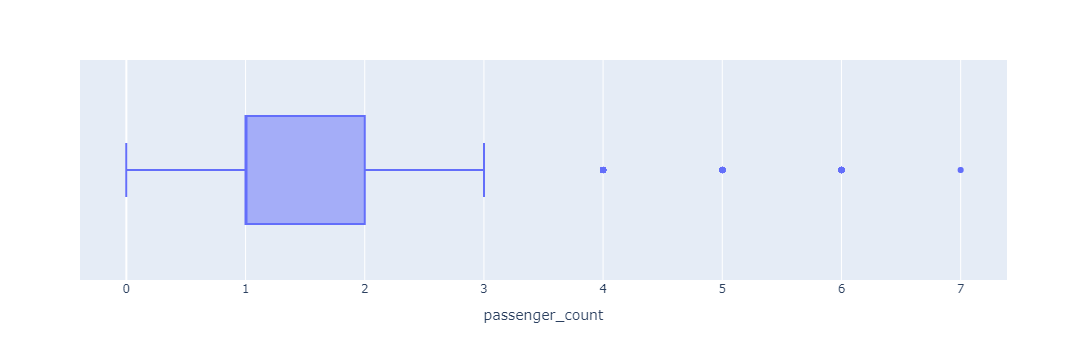

In [80]:
fig = px.box(allyears_Analisis_join, x="passenger_count")
fig.show()

In [113]:
#Barras
#plt.bar(allyears_Analisis_join['year'],allyears_Analisis_join['total_amount'].sum())

In [112]:
#aggs = {'passenger_count':allyears_Analisis_join['passenger_count']}
df_daily = allyears_Analisis_join.groupby('year')
o_df_daily = str(df_daily)
o_df_daily

'<pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001BC75C3F640>'

In [36]:
dfDatosPassenger = allyears_Analisis_join[['year', 'passenger_count']]

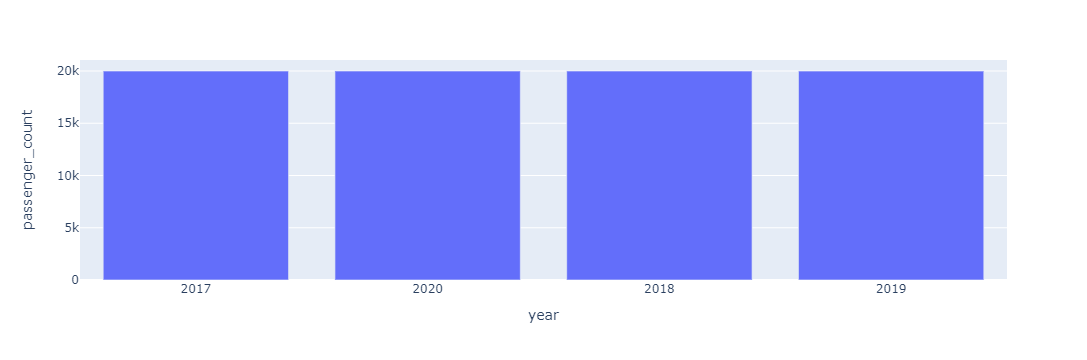

In [37]:
#Graficar la frecuencia absoluta de año por cantidad de pasajeros
data_passenger = dfDatosPassenger['year'].value_counts().reset_index()
data_passenger.columns=['year','passenger_count']
fig = px.bar(data_passenger, x='year', y='passenger_count')
fig.show()


In [52]:
#Graficar la frecuencia absoluta de año por ingresos
dfDatosTotalAmount = allyears_Analisis_join[['year', 'total_amount']]

In [53]:
data_amount = dfDatosTotalAmount['year'].value_counts().reset_index()

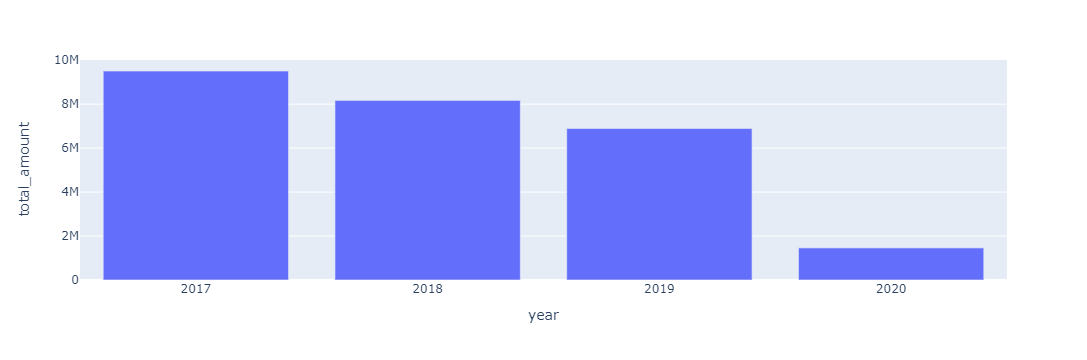

In [54]:
data_amount.columns=['year','total_amount']
fig1 = px.bar(data_amount, x='year', y='total_amount')
fig1.show()

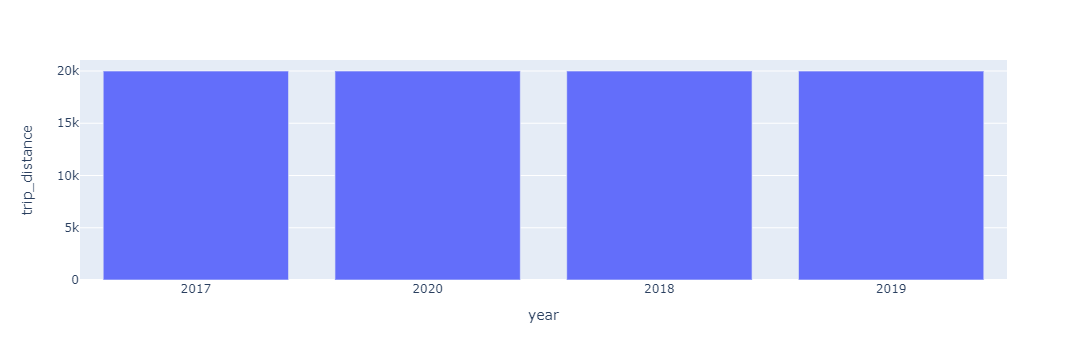

In [87]:
#Graficar la frecuencia absoluta de año por ingresos
dfDatosTotalAmount = allyears_Analisis_join[['year', 'trip_distance']]
data_amount = dfDatosTotalAmount['year'].value_counts().reset_index()
data_amount.columns=['year','trip_distance']
fig1 = px.bar(data_amount, x='year', y='trip_distance')
fig1.show()


In [84]:
print(taxis_201712['total_amount'].describe())
print(taxis_201812['total_amount'].describe())
print(taxis_201912['total_amount'].describe())
print(taxis_202012['total_amount'].describe())


count    20000.000000
mean        15.876754
std         15.142312
min         -7.300000
25%          8.760000
50%         12.300000
75%         18.360000
max        892.800000
Name: total_amount, dtype: float64
count    20000.000000
mean        15.736774
std         11.675003
min        -52.800000
25%          8.800000
50%         12.300000
75%         18.360000
max        350.300000
Name: total_amount, dtype: float64
count    19999.000000
mean        18.249128
std         13.078475
min        -55.800000
25%         11.160000
50%         14.750000
75%         20.750000
max        363.360000
Name: total_amount, dtype: float64
count    20000.000000
mean        15.687868
std         10.520131
min       -177.050000
25%         10.560000
50%         13.390000
75%         17.600000
max        244.800000
Name: total_amount, dtype: float64


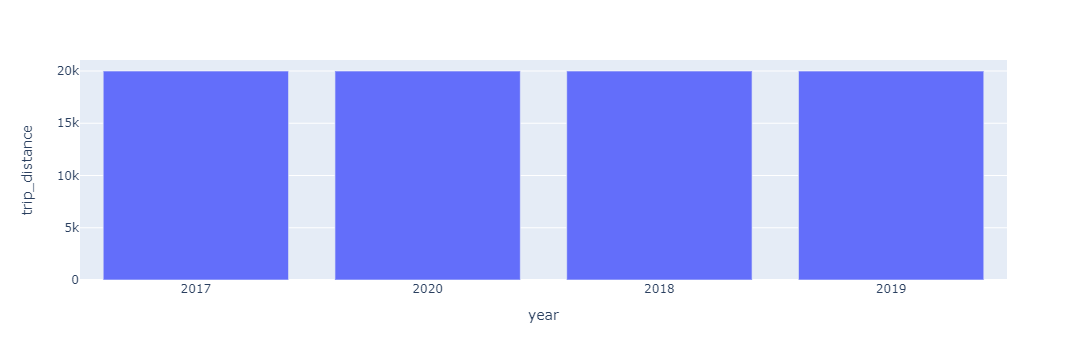

In [88]:
#Graficar la frecuencia absoluta de año por ingresos
dfTripDistance = allyears_Analisis_join[['year', 'trip_distance']]
TripDistance = dfTripDistance['year'].value_counts().reset_index()
TripDistance.columns=['year','trip_distance']
fig4 = px.bar(TripDistance, x='year', y='trip_distance')
fig4.show()

In [89]:
print(TripDistance.describe())

       trip_distance
count           4.00
mean        19999.75
std             0.50
min         19999.00
25%         19999.75
50%         20000.00
75%         20000.00
max         20000.00
